In [8]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, precision_score, recall_score, f1_score, log_loss

In [2]:
train_data = pd.read_csv('/Users/pahan/Desktop/Basics-of-Static-Training/data/train.csv')
test_data = pd.read_csv('/Users/pahan/Desktop/Basics-of-Static-Training/data/test.csv')
gender_submission = pd.read_csv('/Users/pahan/Desktop/Basics-of-Static-Training/data/gender_submission.csv')

In [3]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

X_train = train_data[['Pclass', 'Age', 'Fare', 'Sex', 'Embarked']]
X_test = test_data[['Pclass', 'Age', 'Fare', 'Sex', 'Embarked']]

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

y_train = train_data['Survived']

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] 

In [6]:
test_data = test_data.merge(gender_submission, on='PassengerId', how='left')
y_test = test_data['Survived'] 

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


In [9]:
auc = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_prob)

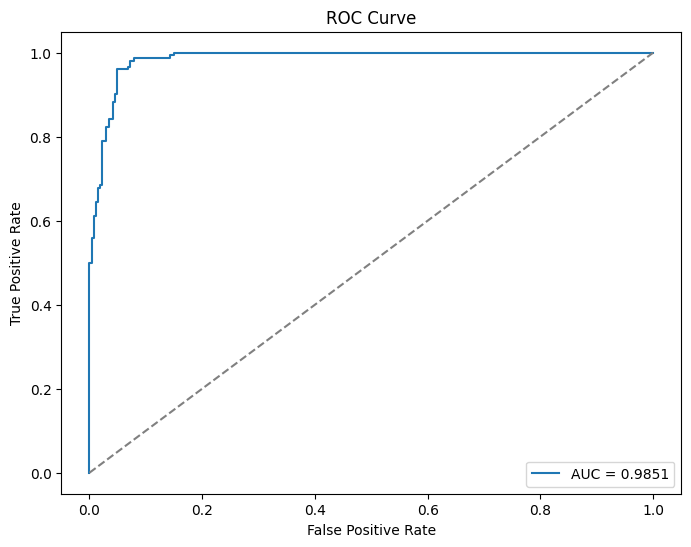

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

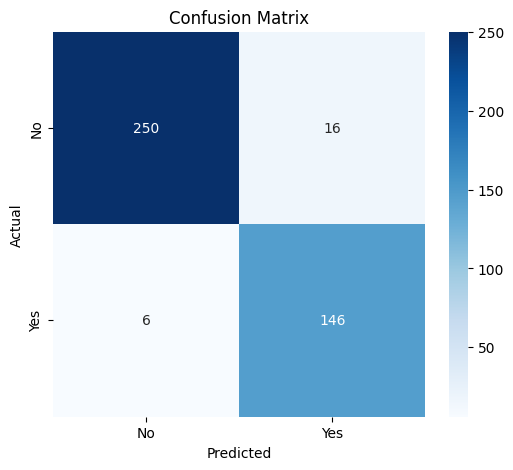

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
print(f'AUC: {auc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Log Loss: {logloss:.4f}')

# Сводка по меткам
print(classification_report(y_test, y_pred))

AUC: 0.9851
Precision: 0.9012
Recall: 0.9605
F1 Score: 0.9299
Log Loss: 0.2844
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       266
           1       0.90      0.96      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.95      0.95       418



In [7]:
import joblib

joblib.dump(model, '/Users/pahan/Desktop/Basics-of-Static-Training/models/log_reg_model.pkl')

['/Users/pahan/Desktop/Basics-of-Static-Training/models/log_reg_model.pkl']